In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.cluster import KMeans

In [3]:
# X = np.load('X_total_ceew.npy')
X = np.load('Xmeterav_total_ceew.npy')
# X = np.load('/content/drive/My Drive/Colab/EI_conf/DeepLearn/X_total_ceew.npy')

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler


In [5]:
def plot(cluster_centers, name):
    plt.figure(figsize=(12, 6))
    for i, center in enumerate(cluster_centers):
        plt.plot(center, label=f'Cluster {i}')

    plt.title('Cluster Centroids of Hourly Load Curves ' + name)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()    

In [6]:
def kshape(X, n_clusters):
    
    X_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X)
    ks = KShape(n_clusters=n_clusters, verbose=False, random_state=0)
    ks_cluster_assignments = ks.fit_predict(X_scaled)
    ks.cluster_centers_.shape
    
    cluster_centers = ks.cluster_centers_
    return cluster_centers, ks_cluster_assignments

## k-shape

In [7]:
import kshape
import numpy as np
from kshape.core import KShapeClusteringCPU 

In [29]:
X1 = X
X2 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2.shape

(84, 24, 1)

In [30]:
n_clusters = 4

In [31]:
# CPU Model

# ksc = KShapeClusteringCPU(n_clusters, centroid_init='zero', max_iter=100, n_jobs=-1)
# X2a = TimeSeriesScalerMeanVariance().fit_transform(X2)
# ksc.fit(X2a)
# labels = ksc.labels_ # or ksc.predict(univariate_ts_datasets)
# cluster_centroids = ksc.centroids_


In [32]:
#TS learn

# X2a = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
# ksc = KShape(n_clusters=n_clusters, verbose=False, random_state=0)
# ksc.fit(X2a)
# labels = ksc.labels_
# ksc.cluster_centers_.shape
# cluster_centroids = ksc.cluster_centers_

In [33]:
# DBA K-means

X2a = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
dba_km = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="euclidean",
                          verbose=True,
                          n_jobs = 10,
                          random_state=0)
dba_km.fit(X2a)
labels = dba_km.labels_
dba_km.cluster_centers_.shape
cluster_centroids = dba_km.cluster_centers_


Init 1
20.279 --> 12.936 --> 12.450 --> 12.273 --> 12.251 --> 12.251 --> 
Init 2
18.770 --> 12.789 --> 12.537 --> 12.427 --> 12.388 --> 12.371 --> 12.371 --> 


In [34]:
for i in range(n_clusters):
    num_points_in_cluster = len(X2a[labels == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 17 data points
Cluster 1: 29 data points
Cluster 2: 21 data points
Cluster 3: 17 data points


In [35]:
xc = cluster_centroids
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

In [36]:
df_c

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.212090,-0.027340,-0.229438,-0.363625,-0.618405,-1.022916,-1.535521,-1.088135,-0.404276,-0.115370,...,-0.001581,-0.498297,-0.408582,-0.186715,0.322350,1.150112,1.583876,1.382687,1.092501,0.598132
1,1.209110,1.005641,0.875378,0.583363,0.266089,0.037764,-0.534925,-0.734693,-0.832898,-0.739819,...,-0.283791,-0.234129,-0.387154,-0.744016,-0.733742,-0.340923,0.284228,0.944802,1.376471,1.515922
2,-0.921142,-0.809613,-0.728209,-0.652647,-0.428811,-0.021761,0.184419,0.814674,1.374426,0.976433,...,0.241247,-0.115106,-0.200976,-0.239816,-0.084645,0.386467,0.319094,0.013923,-0.476221,-0.819650
3,0.088363,0.005168,-0.049893,-0.058864,-0.097151,-0.138839,-1.220101,-1.697185,-0.495624,1.192869,...,0.313290,0.037089,-0.303565,-0.603075,-0.817497,-0.398235,0.079330,0.264778,0.261249,0.172598


<Axes: >

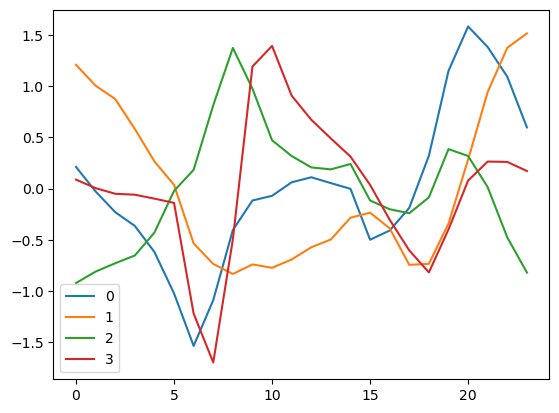

In [37]:
df_c.T.plot()

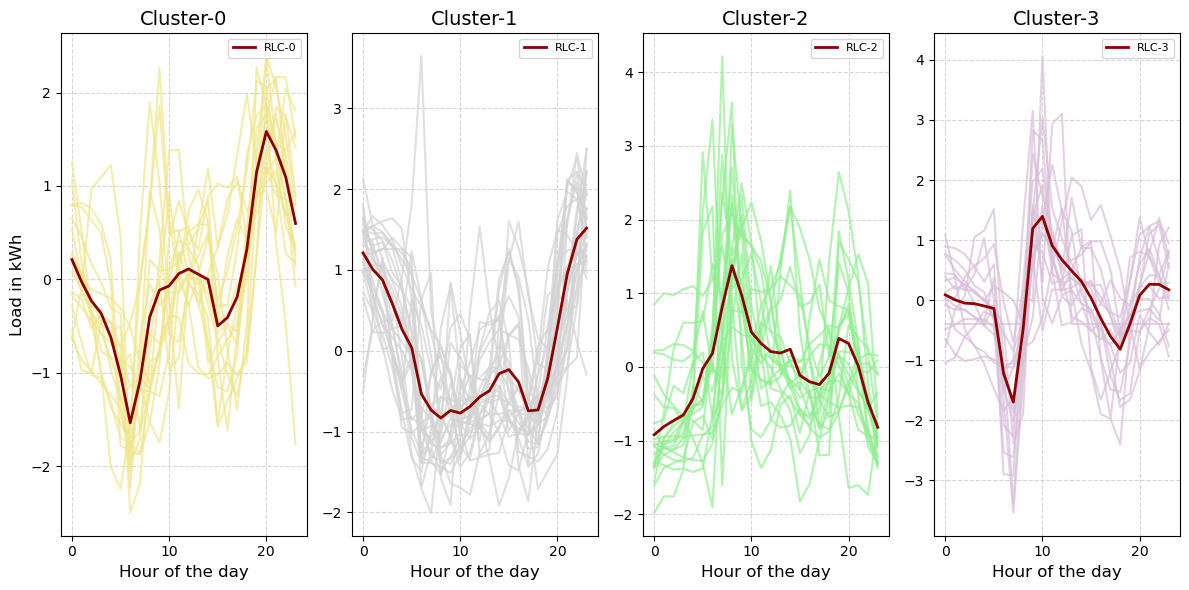

In [38]:
plt.figure(figsize=(12, 6))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2a.reshape((X2a.shape[0], X2a.shape[1]))
    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
#     plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()


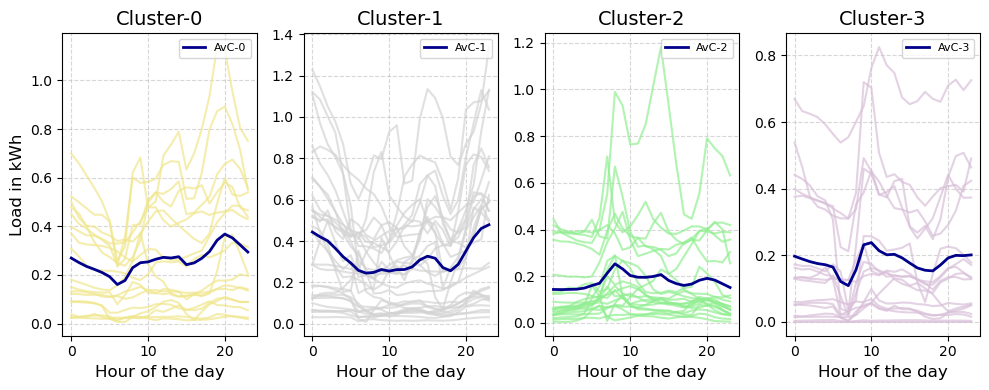

In [39]:
plt.figure(figsize=(10, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2a.shape[0], X2a.shape[1]))
    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()


In [40]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X2b[labels == j], axis=1) 
    peak_rlc = np.argmax(xc[j, :])
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

23.0 0.27380952380952384


In [41]:
labels =dba_km.fit_predict(X2b) 

Init 1
0.332 --> 0.206 --> 0.196 --> 0.195 --> 0.195 --> 
Init 2
0.334 --> 0.207 --> 0.204 --> 0.203 --> 0.203 --> 


In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(X2b, labels)

0.5674376803907006

In [44]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
silhouette_score(X2b, labels,metric=dtw)

0.6049858384422899

In [45]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X2b, labels)

144.48252449901193

In [46]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X2b, labels)

0.9007929177832066

In [47]:
#SBD
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(np.mean(X1[labels == j],axis=0), X1[labels == j][i,:])
        
print(k)

35.65514099886731


In [48]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(dmd_pk, axis=0)
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

9.0 0.10714285714285714


NameError: name 'euclidean_distances' is not defined

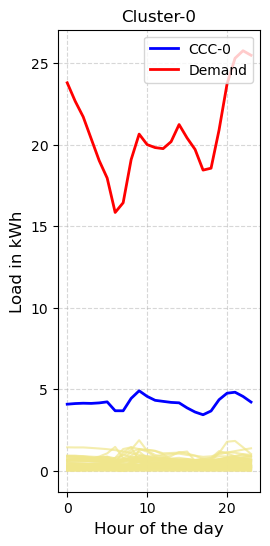

In [49]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(3):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X1[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
# plt.savefig("final/cc_kshape.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(xc[j, :].T, X2b[labels == j][i,:].reshape(1,-1))
print(k)


In [ ]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    
    x1 = X1[labels == j]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
    peak_dem = np.argmax(dmd_pk, axis=0)
    c[j,peak_dem] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
#         print(i,peak_dem,c,y)
    l = l + len(X[labels == j])
    print(peaks_indices,pm)
print(pm, peak_dem)